In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('heart.xlsx')

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.shape

(299, 13)

In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

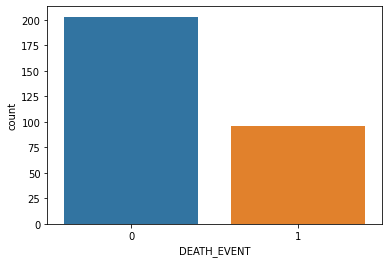

In [6]:
sns.countplot(df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

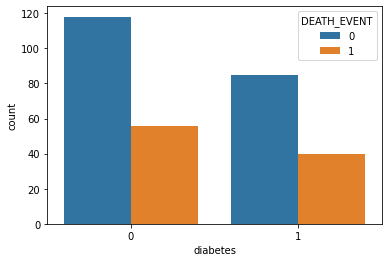

In [7]:
sns.countplot(x='diabetes',hue='DEATH_EVENT',data=df)

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

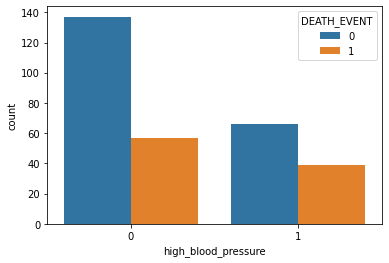

In [8]:
sns.countplot(x='high_blood_pressure',hue='DEATH_EVENT',data=df)

In [9]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<AxesSubplot:title={'center':'Correlation for every column'}>

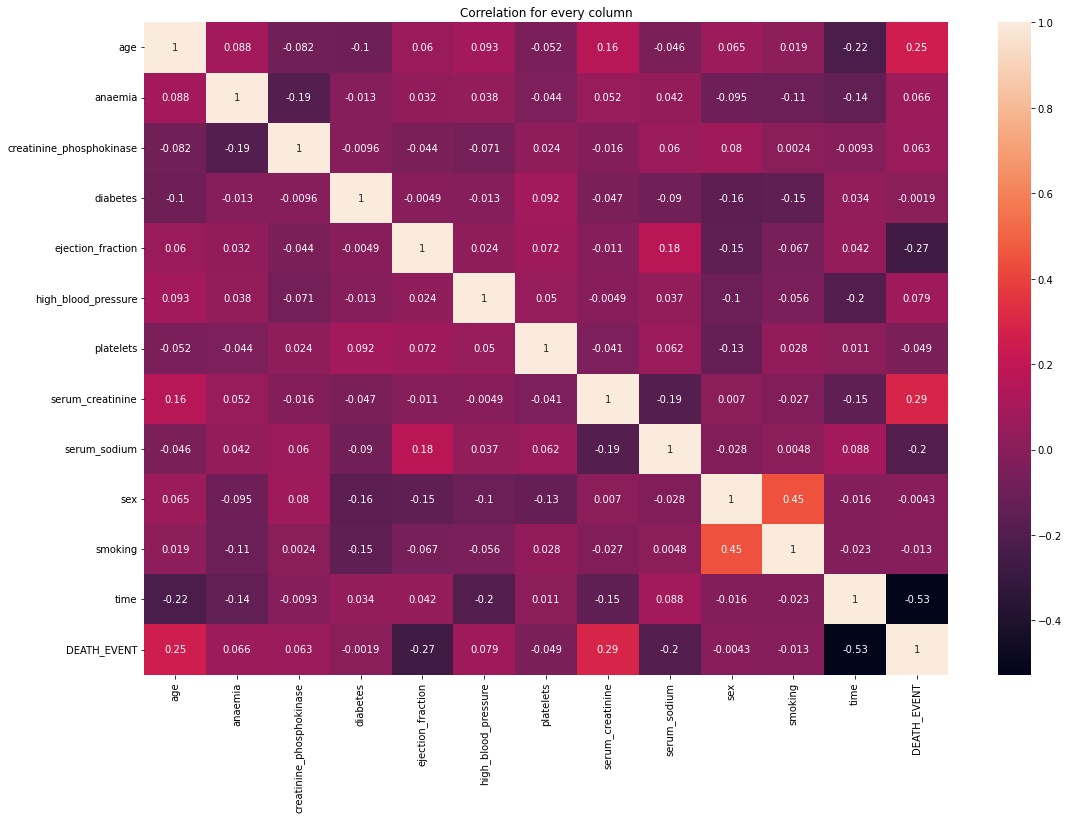

In [10]:
plt.figure(figsize=(18,12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(),annot=True)

# Separete X,Y

In [11]:
x = df.drop('DEATH_EVENT',axis=1)

In [12]:
y=df[['DEATH_EVENT']]

In [13]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [14]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [15]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.3,random_state=42)

In [16]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [17]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [18]:
xtrain.shape

(209, 12)

In [19]:
xtest.shape

(90, 12)

In [20]:
dt = DecisionTreeClassifier()

In [21]:
dt.fit(xtrain,ytrain)

DecisionTreeClassifier()

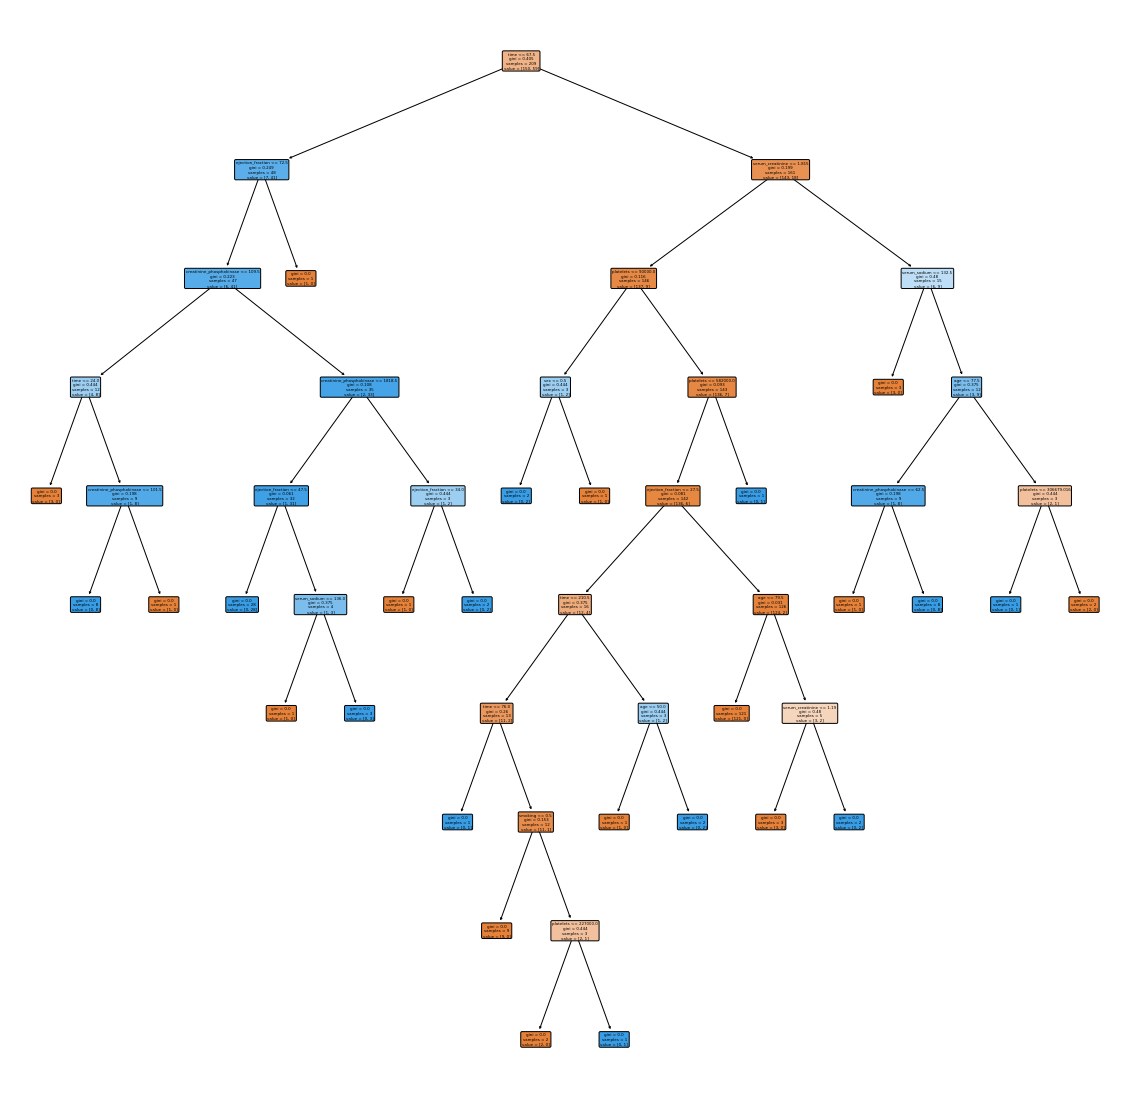

In [22]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt,filled=True,rounded=True,feature_names=x.columns)
plt.savefig('tree.png',dpi=1200)

In [23]:
pred = dt.predict(xtest)

In [24]:
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [25]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confusion Matrix

In [26]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.67      0.79      0.72        53\n           1       0.59      0.43      0.50        37\n\n    accuracy                           0.64        90\n   macro avg       0.63      0.61      0.61        90\nweighted avg       0.64      0.64      0.63        90\n'

In [27]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72        53
           1       0.59      0.43      0.50        37

    accuracy                           0.64        90
   macro avg       0.63      0.61      0.61        90
weighted avg       0.64      0.64      0.63        90



In [28]:
cm = confusion_matrix(ytest,pred)

In [29]:
cm

array([[42, 11],
       [21, 16]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

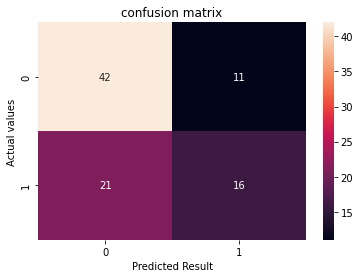

In [30]:
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Result')
plt.ylabel('Actual values')
plt.title('confusion matrix')

In [31]:
tp,fn,fp,tn = confusion_matrix(ytest,pred).reshape(-1)

In [32]:
tp

42

In [33]:
fn

11

In [34]:
fp

21

In [35]:
tn

16

In [36]:
accuracy = (tp+tn)/(tp+fp+fn+tn)

In [37]:
accuracy

0.6444444444444445

In [38]:
precision = tp/(tp+fp)

In [39]:
precision

0.6666666666666666

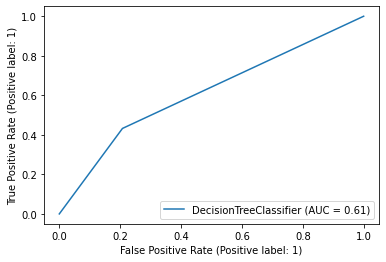

In [40]:
from sklearn.metrics import plot_roc_curve as pc
pc(dt,xtest,ytest)

In [43]:
accuracy_score(ytest,pred)

0.6444444444444445

In [44]:
dt.score(xtest,ytest)

0.6444444444444445

# Random Forest Classifier

In [82]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
{'n_estimators': 135,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

{'n_estimators': 135,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

In [87]:
rf = RandomForestClassifier(n_estimators=135,min_samples_split=3,max_depth=11,max_features='log2',criterion='entropy')

In [88]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)

In [89]:
rf.score(xtest,ytest)

0.7666666666666667

# Random Search CV

In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
tree = np.random.randint(15,150,30) #15 theke 150 er moddhe 30 ta tree generate korbe

In [52]:
tree

array([109, 142,  88, 103,  64,  20,  85, 147,  65,  71, 134,  32, 131,
        69,  38,  27,  67,  96, 101,  24, 145, 116,  29,  33, 135,  18,
       123,  48, 122,  21])

In [54]:
max_features = ['sqrt','log2']
max_depth = np.random.randint(2,12,50)
criterion = ['gini','entropy']
min_samples_split = [2,3,4]

grid = {
    
    'n_estimators' : tree,
    'criterion' : criterion,
    'max_features' : max_features,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split
    
}


In [55]:
print(grid)

{'n_estimators': array([109, 142,  88, 103,  64,  20,  85, 147,  65,  71, 134,  32, 131,
        69,  38,  27,  67,  96, 101,  24, 145, 116,  29,  33, 135,  18,
       123,  48, 122,  21]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([10,  9,  9,  8,  4,  3,  4,  2,  3,  7,  3,  5, 11,  5,  3,  9,  5,
        7,  5, 10,  6,  9,  8, 11,  2,  8,  7,  8, 11, 11,  6,  3,  6,  4,
        5,  2,  9,  4,  9,  3,  9,  4,  8,  8,  7,  9,  7,  8,  3,  3]), 'min_samples_split': [2, 3, 4]}


In [56]:
rcv = RandomizedSearchCV(rf,grid,n_iter=100,cv=3)

In [57]:
rcv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([10,  9,  9,  8,  4,  3,  4,  2,  3,  7,  3,  5, 11,  5,  3,  9,  5,
        7,  5, 10,  6,  9,  8, 11,  2,  8,  7,  8, 11, 11,  6,  3,  6,  4,
        5,  2,  9,  4,  9,  3,  9,  4,  8,  8,  7,  9,  7,  8,  3,  3]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([109, 142,  88, 103,  64,  20,  85, 147,  65,  71, 134,  32, 131,
        69,  38,  27,  67,  96, 101,  24, 145, 116,  29,  33, 135,  18,
       123,  48, 122,  21])})

In [58]:
rcv.cv_results_

{'mean_fit_time': array([0.2746013 , 0.08474477, 0.06062841, 0.24001614, 0.18075395,
        0.04561973, 0.18122768, 0.12641239, 0.16828378, 0.06528966,
        0.05696599, 0.05396136, 0.22889241, 0.25352256, 0.03765138,
        0.1735603 , 0.31282147, 0.04631273, 0.22421336, 0.03298322,
        0.08093731, 0.05667114, 0.3043824 , 0.17790445, 0.06929874,
        0.27006984, 0.16202188, 0.03730655, 0.14526558, 0.14159004,
        0.16986283, 0.12958892, 0.04385694, 0.12925744, 0.04896386,
        0.04630566, 0.08670092, 0.08253614, 0.25885765, 0.17569431,
        0.21622109, 0.05697664, 0.12995021, 0.192916  , 0.12435476,
        0.18023658, 0.09995214, 0.27309934, 0.2507054 , 0.1203862 ,
        0.11328252, 0.06063573, 0.11978197, 0.18490283, 0.20992374,
        0.0579838 , 0.05897482, 0.04664334, 0.24038514, 0.11161947,
        0.22300299, 0.35499501, 0.05985419, 0.14990624, 0.17956305,
        0.17423312, 0.03731155, 0.04164433, 0.07029279, 0.13592744,
        0.04031142, 0.13060252,

In [59]:
tuning_result = pd.DataFrame(rcv.cv_results_)

In [60]:
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.274601,0.043316,0.021320,1.246513e-03,142,3,sqrt,3,entropy,"{'n_estimators': 142, 'min_samples_split': 3, ...",0.828571,0.928571,0.855072,0.870738,0.042301,39
1,0.084745,0.009343,0.007329,4.708090e-04,48,3,sqrt,2,gini,"{'n_estimators': 48, 'min_samples_split': 3, '...",0.771429,0.900000,0.797101,0.822843,0.055556,100
2,0.060628,0.004794,0.005996,3.371748e-07,32,2,sqrt,11,entropy,"{'n_estimators': 32, 'min_samples_split': 2, '...",0.828571,0.928571,0.855072,0.870738,0.042301,39
3,0.240016,0.008187,0.021020,4.216893e-03,134,2,log2,11,entropy,"{'n_estimators': 134, 'min_samples_split': 2, ...",0.828571,0.971429,0.855072,0.885024,0.062048,4
4,0.180754,0.001810,0.016983,2.818220e-03,101,2,sqrt,11,entropy,"{'n_estimators': 101, 'min_samples_split': 2, ...",0.828571,0.942857,0.869565,0.880331,0.047274,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.202417,0.007470,0.017346,1.266143e-03,122,4,sqrt,10,entropy,"{'n_estimators': 122, 'min_samples_split': 4, ...",0.828571,0.942857,0.840580,0.870669,0.051279,46
96,0.047904,0.001316,0.005658,4.681933e-04,29,3,log2,3,gini,"{'n_estimators': 29, 'min_samples_split': 3, '...",0.771429,0.928571,0.869565,0.856522,0.064813,81
97,0.119261,0.001695,0.010325,4.839323e-04,71,4,sqrt,11,entropy,"{'n_estimators': 71, 'min_samples_split': 4, '...",0.785714,0.928571,0.869565,0.861284,0.058614,69
98,0.030649,0.001246,0.003998,2.973602e-07,18,3,log2,3,entropy,"{'n_estimators': 18, 'min_samples_split': 3, '...",0.800000,0.914286,0.869565,0.861284,0.047023,69


In [61]:
rcv.best_score_

0.8945479641131815

In [71]:
rcv.best_params_

{'n_estimators': 135,
 'min_samples_split': 3,
 'max_features': 'log2',
 'max_depth': 11,
 'criterion': 'entropy'}

In [74]:
rcv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)

In [75]:
rcv2 = rcv.best_estimator_

In [76]:
rcv2.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_split=3, n_estimators=135)

In [77]:
rcv2.score(xtest,ytest)

0.7666666666666667

In [78]:
rcv2.base_estimator_

DecisionTreeClassifier()

In [ ]:
rf.fit